# Substructure search

In [2]:
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
from rdkit.Chem.Draw import rdMolDraw2D
from IPython.display import SVG
import itertools
from rdkit.Chem import rdmolops
import pandas as pd
import numpy as np

In [3]:
molecule = Chem.MolFromSmiles("O1C=C[C@H]([C@H]1O2)c3c2cc(OC)c4c3OC(=O)C5=C4CCC(=O)5")

In [4]:
benzen = Chem.MolFromSmiles("c1ccccc1")

In [5]:
molecule.HasSubstructMatch(benzen)

True

In [6]:
molecule.GetSubstructMatch(benzen)

(6, 7, 8, 9, 12, 13)

In [7]:
hit_atoms = molecule.GetSubstructMatch(benzen)

In [8]:
hit_bonds = [molecule.GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(hit_atoms, 2)
             if molecule.GetBondBetweenAtoms(i, j)]

In [9]:
hit_bonds

[6, 24, 7, 8, 11, 12]

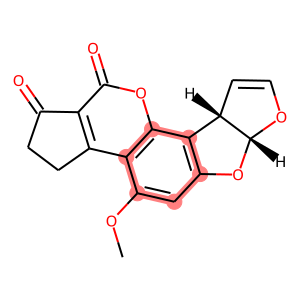

In [10]:
molecule_visualization = rdMolDraw2D.MolDraw2DSVG(300,300)
rdMolDraw2D.PrepareAndDrawMolecule(molecule_visualization, molecule, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
molecule_visualization.FinishDrawing()
display(SVG(molecule_visualization.GetDrawingText()))

In [11]:
def visualize_match(molecule, pattern):
    hit_atoms = molecule.GetSubstructMatch(benzen)
    hit_bonds = [molecule.GetBondBetweenAtoms(i, j).GetIdx()
             for i, j in itertools.combinations(hit_atoms, 2)
             if molecule.GetBondBetweenAtoms(i, j)]
    molecule_visualization = rdMolDraw2D.MolDraw2DSVG(300,300)
    rdMolDraw2D.PrepareAndDrawMolecule(molecule_visualization, molecule, highlightAtoms=hit_atoms, highlightBonds=hit_bonds)
    molecule_visualization.FinishDrawing()
    display(SVG(molecule_visualization.GetDrawingText()))

In [12]:
rdmolops.GetSSSR(molecule)

5

In [13]:
data = pd.read_csv("data/chembl_Vasopressin_V1a_receptor_KI.csv", delimiter = ";")

In [14]:
smiles = data["Smiles"]
smiles.fillna("", inplace = True)
molecules = [Chem.MolFromSmiles(smile) for smile in smiles]
data["molecule"] = molecules

## Benzen substructure search

In [15]:
len([mol.HasSubstructMatch(benzen) for mol in data["molecule"]])

1717

In [16]:
data["benzen_substructure"] = [mol.HasSubstructMatch(benzen) for mol in data["molecule"]]

In [17]:
# [visualize_match(mol, benzen) for mol in data["molecule"] if mol.HasSubstructMatch(benzen)]

## Carboxyl group subsructure search

In [18]:
carboxyl_group = Chem.MolFromSmiles("*C(=O)O")
sum([mol.HasSubstructMatch(carboxyl_group) for mol in data["molecule"]])

0

In [19]:
data["carboxyl_group_substructure"] = [mol.HasSubstructMatch(carboxyl_group) for mol in data["molecule"]]

In [20]:
# [visualize_match(mol, carboxyl_group) for mol in data["molecule"] if mol.HasSubstructMatch(carboxyl_group)]

## Propan substructure search

In [21]:
propan = Chem.MolFromSmiles("CCC")
sum([mol.HasSubstructMatch(propan) for mol in data["molecule"]])

1382

In [22]:
data["propan_substructure"] = [mol.HasSubstructMatch(propan) for mol in data["molecule"]]

In [23]:
# [visualize_match(mol, propan) for mol in data["molecule"] if mol.HasSubstructMatch(propan)]

## Ring substructure search

In [24]:
ring = Chem.MolFromSmarts("[R]")
sum([mol.HasSubstructMatch(ring) for mol in data["molecule"]])

1632

In [25]:
data["ring_substructure"] = [mol.HasSubstructMatch(ring) for mol in data["molecule"]]

In [26]:
# [visualize_match(mol, ring) for mol in data["molecule"] if mol.HasSubstructMatch(ring)]

In [60]:
data[["benzen_substructure", "propan_substructure", "carboxyl_group_substructure", "ring_substructure"]] = data[["benzen_substructure", "propan_substructure", "carboxyl_group_substructure", "ring_substructure"]].replace([False, True], [0, 1])

### Visualize substructure representation

array([[<AxesSubplot:title={'center':'benzen_substructure'}>,
        <AxesSubplot:title={'center':'propan_substructure'}>],
       [<AxesSubplot:title={'center':'carboxyl_group_substructure'}>,
        <AxesSubplot:title={'center':'ring_substructure'}>]], dtype=object)

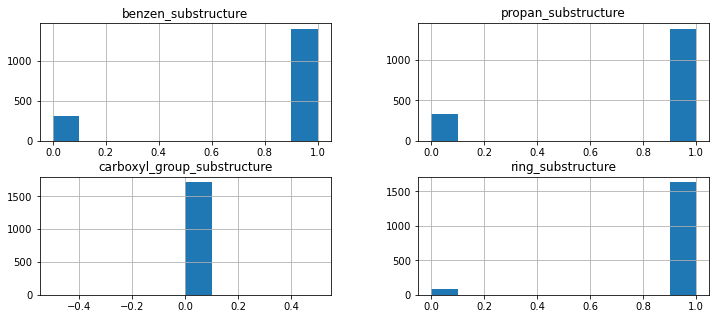

In [63]:
data[["benzen_substructure", "propan_substructure", "carboxyl_group_substructure", "ring_substructure"]].hist(figsize=(12, 5))

## PAINS substructure search in ligand dataset

In [29]:
p_l15 = pd.read_csv("../data/pains/p_l15.txt", delim_whitespace = True, header = None)

In [30]:
p_l15.head()

,0,1
0,c:1:c:c(:c:c:c:1-[#6;X4]-c:2:c:c:c(:c:c:2)-[#7...,"<regId=""anil_di_alk_F(14)"">"
1,c:1(:c(:c(:c(:c(:c:1-[#1])-[#1])-[#7](-[#1])-[...,"<regId=""hzone_anil(14)"">"
2,"c1(nn(c(c1-[$([#1]),$([#6]-[#1])])-[#8]-[#1])-...","<regId=""het_5_pyrazole_OH(14)"">"
3,c:2(:c:1-[#16]-c:3:c(-[#7](-c:1:c(:c(:c:2-[#1]...,"<regId=""het_thio_666_A(13)"">"
4,[#6]-2-[#6]-c:1:c(:c:c:c:c:1)-[#6](-c:3:c:c:c:...,"<regId=""styrene_A(13)"">"


In [31]:
p_m150 = pd.read_csv("../data/pains/p_m150.txt", delim_whitespace = True, header = None)

In [32]:
p_m150.head()

,0,1
0,[#6]-1(-[#6](~[!#6&!#1]~[#6]-[!#6&!#1]-[#6]-1=...,"<regId=""ene_six_het_A(483)"">"
1,c:1:c:c(:c(:c:c:1)-[#6]=[#7]-[#7])-[#8]-[#1],"<regId=""hzone_phenol_A(479)"">"
2,[#6](-[#1])(-[#1])-[#7](-[#6](-[#1])-[#1])-c:1...,"<regId=""anil_di_alk_A(478)"">"
3,n:1(c(c(c:2:c:1:c:c:c:c:2-[#1])-[#6;X4]-[#1])-...,"<regId=""indol_3yl_alk(461)"">"
4,"[!#6&!#1]=[#6]-1-[#6]=,:[#6]-[#6](=[!#6&!#1])-...","<regId=""quinone_A(370)"">"


In [33]:
pains = pd.concat([p_l15, p_m150])

In [34]:
pains["molecule"] = [Chem.MolFromSmarts(pain_smarts) for pain_smarts in pains.iloc[:, 0]]

In [50]:
for index, molecule in enumerate(data["molecule"]):
    data.loc[index, "pains"] = sum([molecule.HasSubstructMatch(pain) for pain in pains["molecule"]])

In [52]:
data["pains"].sum()

69

In [53]:
data["pains"].max()

1

Therea are 69 different ligands containing one PAINS substructure.